In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

2024-04-04 20:45:52.648277: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 20:45:52.838004: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 20:45:53.511969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 20:45:55.527675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
X_train=np.loadtxt('input.csv', delimiter=',')
Y_train=np.loadtxt('labels.csv', delimiter=',')

X_test=np.loadtxt('input_test.csv', delimiter=',')
Y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [4]:
X_train.shape

(2000, 30000)

In [5]:
X_train[1:]

array([[131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       [149., 173., 151., ...,  56.,  56.,  66.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [6]:
#Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


#add values between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

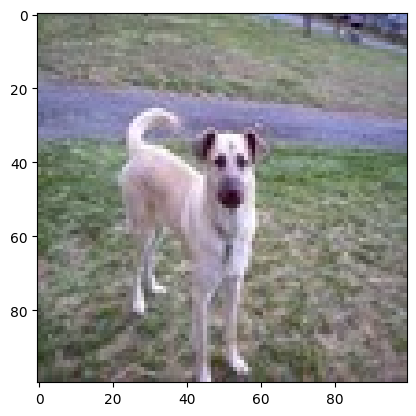

In [33]:
import random
import matplotlib.pyplot as plt

index = random.randint(0, len(X_train))
plt.imshow(X_train[index, :])
plt.show()

In [11]:
#Build the Neural Network

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)), #32 filters and (3,3) size filters
    MaxPooling2D((2,2)), #2*2 size filter

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),#64 neurons
    Dense(1,activation='sigmoid')
])
    

/home/sovan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #backpropagation

In [13]:
model.fit(X_train,Y_train, epochs=10, batch_size=50)   #Model training

Epoch 1/10


2024-04-04 20:46:59.055105: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.
2024-04-04 20:47:01.107261: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61465600 exceeds 10% of free system memory.
2024-04-04 20:47:01.325147: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27992448 exceeds 10% of free system memory.
2024-04-04 20:47:01.457930: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30732800 exceeds 10% of free system memory.
2024-04-04 20:47:01.458074: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61465600 exceeds 10% of free system memory.


40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 414ms/step - accuracy: 0.5096 - loss: 0.8227
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.5978 - loss: 0.6693
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 0.6868 - loss: 0.5844
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.7151 - loss: 0.5628
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.7751 - loss: 0.4769
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 412ms/step - accuracy: 0.8249 - loss: 0.4181
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 412ms/step - accuracy: 0.8317 - loss: 0.3846
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 414ms/step - accuracy: 0.8761 - loss: 0.3005
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 415ms/step - accuracy: 0.8980 - loss: 0.2610
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.9428 - loss: 0.1859


In [14]:
model.evaluate(X_test,Y_test)   #test dataset size was small

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6911 - loss: 0.8087


[0.7489089965820312, 0.6899999976158142]

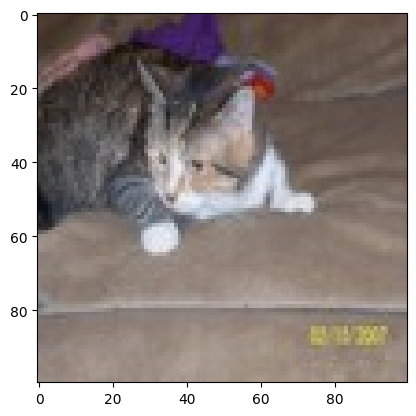

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Our model says it is a : cat


In [25]:
#predict a new image

index1 = random.randint(0, len(Y_test))
plt.imshow(X_test[index1, :])
plt.show()

y_pred = model.predict(X_test[index1, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    result = 'dog'
else:
    result = 'cat'
    
print("Our model says it is a :", result)